In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read the file
df_x = pd.read_csv('eval_x.csv')
# add a column for expert
df_x['expert'] = False
# read the file
df_y = pd.read_csv('eval_xe.csv')
# add a column for expert
df_y['expert'] = True
# concat
df = pd.concat([df_x, df_y])
# save to csv
df.to_csv('eval.csv', index=False)

In [ ]:
# use seaborn to plot
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
# plot
fig, axs = plt.subplots(3, 4, figsize=(40, 20))
sns.lineplot(x='mass_x', y='rew', hue='expert', data=df, ax=axs[0,0], errorbar=('sd', 0.2))
sns.lineplot(x='mass_y', y='rew', hue='expert', data=df, ax=axs[0,1], errorbar=('sd', 0.2))
sns.lineplot(x='mass_z', y='rew', hue='expert', data=df, ax=axs[0,2], errorbar=('sd', 0.2))
sns.lineplot(x='decay_x', y='rew', hue='expert', data=df, ax=axs[1,0], errorbar=('sd', 0.2))
sns.lineplot(x='decay_y', y='rew', hue='expert', data=df, ax=axs[1,1], errorbar=('sd', 0.2))
sns.lineplot(x='decay_z', y='rew', hue='expert', data=df, ax=axs[1,2], errorbar=('sd', 0.2))
sns.lineplot(x='param_0', y='rew', hue='expert', data=df, ax=axs[2,0], errorbar=('sd', 0.2))
sns.lineplot(x='param_1', y='rew', hue='expert', data=df, ax=axs[2,1], errorbar=('sd', 0.2))
sns.lineplot(x='param_2', y='rew', hue='expert', data=df, ax=axs[2,2], errorbar=('sd', 0.2))
sns.lineplot(x='param_3', y='rew', hue='expert', data=df, ax=axs[2,3], errorbar=('sd', 0.2))

In [ ]:
# save the plot
plt.savefig('sensitivity.png')

In [ ]:
df[df['mass_x']==0.006].var()

In [ ]:
import torch
from icecream import ic
# set ic float precision to 3
# vanilla = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_mlp_vanilla_Dw1.pt')
# ic(vanilla['expert_err_x_final'], vanilla['adapt_err_x_initial'], vanilla['adapt_err_x_end'])
# expert_Dw0 = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_mlp_expert_Dw0.pt')
# ic(expert_Dw0['expert_err_x_final'], expert_Dw0['adapt_err_x_initial'], expert_Dw0['adapt_err_x_end'])
expert_Dw1 = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_RMA.pt')
ic(expert_Dw1['expert_err_x_final'], expert_Dw1['adapt_err_x_initial'], expert_Dw1['adapt_err_x_end'])
# expert_Dw1_C4 = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_mlp_expert_Dw1_C4.pt')
# ic(expert_Dw1_C4['expert_err_x_final'], expert_Dw1_C4['adapt_err_x_initial'], expert_Dw1_C4['adapt_err_x_end'])
# print(f"|{vanilla['expert_err_x_final']:.4f}|{vanilla['adapt_err_x_initial']:.4f}|{vanilla['adapt_err_x_end']:.4f}|")
# print(f"|{expert_Dw0['expert_err_x_final']:.4f}|{expert_Dw0['adapt_err_x_initial']:.4f}|{expert_Dw0['adapt_err_x_end']:.4f}|")
print(f"|{expert_Dw1['expert_err_x_final']:.4f}|{expert_Dw1['adapt_err_x_initial']:.4f}|{expert_Dw1['adapt_err_x_end']:.4f}|")

# print(f"|{expert_Dw1_C4['expert_err_x_final']:.4f}|{expert_Dw1_C4['adapt_err_x_initial']:.4f}|{expert_Dw1_C4['adapt_err_x_end']:.4f}|")

In [11]:
# load torch module
import torch
# load the model
model = torch.load('/home/pcy/rl/policy-adaptation-survey/results/rl/ppo_ood-only-res4-center-50.pt')
compressor = model['compressor'].to('cpu')
err = model['expert_err_x_final']

(-1.0994713455438614,
 1.100251707434654,
 -1.0998615264892577,
 1.0998615264892577)

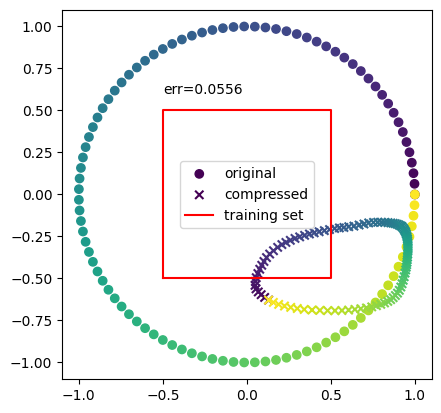

In [15]:
# create xy from a circle with torch
theta = torch.linspace(0, 2*torch.pi, 100)
x = torch.cos(theta)
y = torch.sin(theta)
xy = torch.stack([x, y, torch.ones(100)*1.0, torch.ones(100)*1.0], dim=1)
# get the compressed xy
xy_compressed = compressor(xy)
# plot the result
import matplotlib.pyplot as plt
plt.scatter(xy[:,0], xy[:,1], label='original', c=theta, marker='o')
plt.scatter(xy_compressed[:,0], xy_compressed[:,1], label='compressed', c=theta, marker='x')
# plot red rectangle with corners at (-1, -1), (-1, 0), (0, -1), (0, 0)
u, v = -0.5, 0.5
plt.plot([u, u, v, v, u], [u, v, v, u, u], c='r', label='training set')
# # draw a red rectangle in left down
# plt.plot([-1, -0.5, -0.5, -1, -1], [-1, -1, -0.5, -0.5, -1], c='r', label='training set')
# # draw a red rectangle in right up
# plt.plot([0.5, 1, 1, 0.5, 0.5], [0.5, 0.5, 1, 1, 0.5], c='r')
# # draw a red rectangle in left up
# plt.plot([-1, -0.5, -0.5, -1, -1], [0.5, 0.5, 1, 1, 0.5], c='r')
# # draw a red rectangle in right down
# plt.plot([0.5, 1, 1, 0.5, 0.5], [-1, -1, -0.5, -0.5, -1], c='r')

# add err text
plt.text(-0.5, 0.6, f'err={err:.4f}')
# add legend
plt.legend()
# square the plot
plt.axis('square')